# Bernoulli Distribution and Binomial Distributions - Code Examples

## Simulating a Single Bernoulli Trial

Problem: Simulate a single trial of an event that has a 60% chance of "success" (represented by 1) and a 40% chance of "failure" (represented by 0).

The output will be either 1 or 0. If you run the code multiple times, you'd expect to see 1 appear approximately 60% of the time, illustrating a single Bernoulli trial.

In [17]:
import pandas as pd
from scipy.stats import bernoulli

# Probability of success
p = 0.6

# Generate one random variate (the result of one trial)
# It will be either 1 (success) or 0 (failure)
outcome = bernoulli.rvs(p=p, size=1)

print(f"The probability of success is: {p}")
print(f"The outcome of the single Bernoulli trial is: {outcome[0]}")

The probability of success is: 0.6
The outcome of the single Bernoulli trial is: 0


## Calculating PMF and Properties of a Bernoulli Distribution

Problem: An advertisement has a 25% click-through rate. Model this as a Bernoulli distribution. Calculate and display its Probability Mass Function (PMF), expected value, and variance.


PMF for X=0 (Failure): 0.75
PMF for X=1 (Success): 0.25
Expected Value (Mean): 0.25
Variance: 0.19


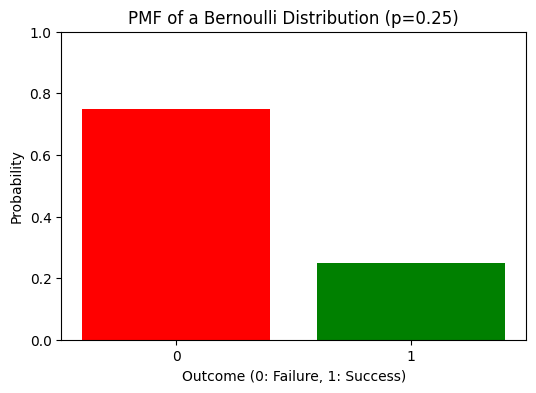

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Probability of a click (success)
p = 0.25

# Calculate the PMF for the two possible outcomes: 0 (no click) and 1 (click)
# P(X=0)
prob_failure = bernoulli.pmf(k=0, p=p)
# P(X=1)
prob_success = bernoulli.pmf(k=1, p=p)

# Calculate the mean (expected value) and variance
mean = bernoulli.mean(p=p)
variance = bernoulli.var(p=p)

print(f"PMF for X=0 (Failure): {prob_failure:.2f}")
print(f"PMF for X=1 (Success): {prob_success:.2f}")
print(f"Expected Value (Mean): {mean:.2f}")
print(f"Variance: {variance:.2f}")

# Visualize the PMF
outcomes = [0, 1]
probabilities = [prob_failure, prob_success]

plt.figure(figsize=(6, 4))
plt.bar(outcomes, probabilities, color=['red', 'green'])
plt.title('PMF of a Bernoulli Distribution (p=0.25)')
plt.xlabel('Outcome (0: Failure, 1: Success)')
plt.ylabel('Probability')
plt.xticks([0, 1])
plt.ylim(0, 1)
plt.show()

## The Manufacturing Defects Problem

Problem: A factory produces components with a 5% defect rate. If a sample of 10 components is selected, what is the probability that exactly 2 components are defective?


In [19]:
from scipy.stats import binom

# Parameters of the binomial distribution
n = 10  # number of trials (components in the sample)
p = 0.05 # probability of success (a component being defective)
k = 2   # the exact number of successes we are interested in

# Calculate the probability mass function P(X=k)
probability = binom.pmf(k, n, p)

print(f"The probability of finding exactly {k} defective components in a sample of {n} is: {probability:.4f}")

The probability of finding exactly 2 defective components in a sample of 10 is: 0.0746


Problem: Continuing with the manufacturing example (n=10, p=0.05):
* What is the probability of finding at most 1 defective component?
* What is the probability of finding at least 2 defective components?

In [20]:
from scipy.stats import binom

# Parameters
n = 10
p = 0.05

# 1. Probability of at most 1 defective component (P(X ≤ 1))
k1 = 1
prob_at_most_1 = binom.cdf(k1, n, p)
print(f"The probability of finding at most {k1} defective component is: {prob_at_most_1:.4f}")

# 2. Probability of at least 2 defective components (P(X ≥ 2))
# This is 1 - P(X ≤ 1)
k2 = 2
prob_at_least_2 = 1 - binom.cdf(k2 - 1, n, p)
# An alternative is to use the survival function (sf), which is 1 - cdf
# prob_at_least_2_sf = binom.sf(k2 - 1, n, p)

print(f"The probability of finding at least {k2} defective components is: {prob_at_least_2:.4f}")

The probability of finding at most 1 defective component is: 0.9139
The probability of finding at least 2 defective components is: 0.0861


More parameters calculated for the same case:

In [ ]:
from scipy.stats import binom

# Parameters from the text
n = 10      # Number of trials (components)
p = 0.05    # Probability of defect (success)

# 1. Calculate P(X = 2): Probability of exactly 2 defective components
prob_exact_2 = binom.pmf(k=2, n=n, p=p)

# 2. Calculate P(X <= 2): Probability of 2 or fewer defective components (CDF)
prob_less_equal_2 = binom.cdf(k=2, n=n, p=p)

# 3. Calculate Mean and Variance using the library's built-in methods
mean = binom.mean(n, p)
var = binom.var(n, p)
std_dev = binom.std(n, p)

print(f"--- Manufacturing Defects (n={n}, p={p}) ---")
print(f"Probability of exactly 2 defects:   {prob_exact_2:.4f}")
print(f"Probability of 2 or fewer defects:  {prob_less_equal_2:.4f}")
print(f"Expected number of defects (Mean):  {mean:.2f}")
print(f"Variance:                           {var:.4f}")
print(f"Standard Deviation:                 {std_dev:.4f}")

--- Manufacturing Defects (n=10, p=0.05) ---
Probability of exactly 2 defects:   0.0746 (Text approx: 0.0746)
Probability of 2 or fewer defects:  0.9885
Expected number of defects (Mean):  0.50
Variance:                           0.4750
Standard Deviation:                 0.6892


## Visualizing Bernoulli vs. Binomial

A Binomial random variable can be thought of as the sum of $n$ independent Bernoulli random variables. We will simulate this relationship using NumPy.

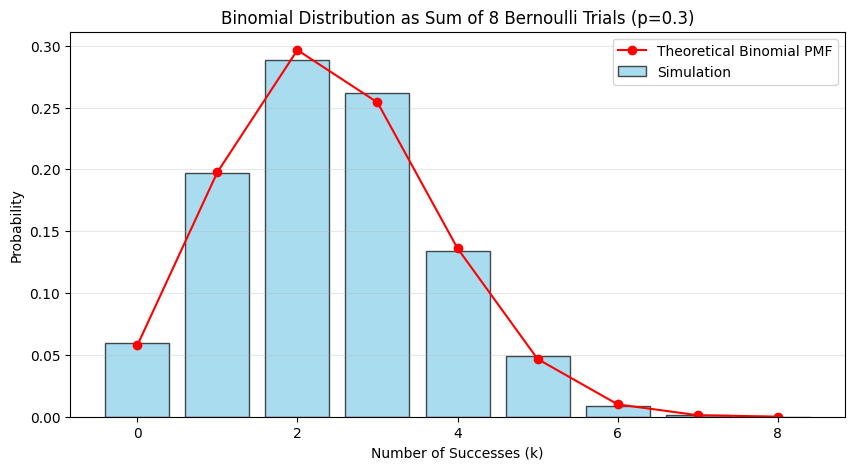

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
p = 0.3         # Probability of success
n_trials = 8    # Number of Bernoulli trials in one Binomial experiment
simulations = 10000 # Number of times we repeat the experiment

# 1. Simulate Bernoulli Trials
# We generate a matrix of random draws (0 or 1)
# Shape: (10000 simulations, 8 trials per simulation)
bernoulli_trials = np.random.choice([0, 1], size=(simulations, n_trials), p=[1-p, p])

# 2. Sum them to get Binomial outcomes
# Summing across the rows (axis=1) gives the count of successes per experiment
binomial_outcomes = bernoulli_trials.sum(axis=1)

# Visualization
plt.figure(figsize=(10, 5))
unique, counts = np.unique(binomial_outcomes, return_counts=True)
plt.bar(unique, counts/simulations, color='skyblue', edgecolor='black', alpha=0.7, label='Simulation')

# Overlay theoretical probabilities for comparison
from scipy.stats import binom
x = np.arange(0, n_trials + 1)
plt.plot(x, binom.pmf(x, n_trials, p), 'ro-', label='Theoretical Binomial PMF')

plt.title(f"Binomial Distribution as Sum of {n_trials} Bernoulli Trials (p={p})")
plt.xlabel("Number of Successes (k)")
plt.ylabel("Probability")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

The same example as before but using np.random.binomial:

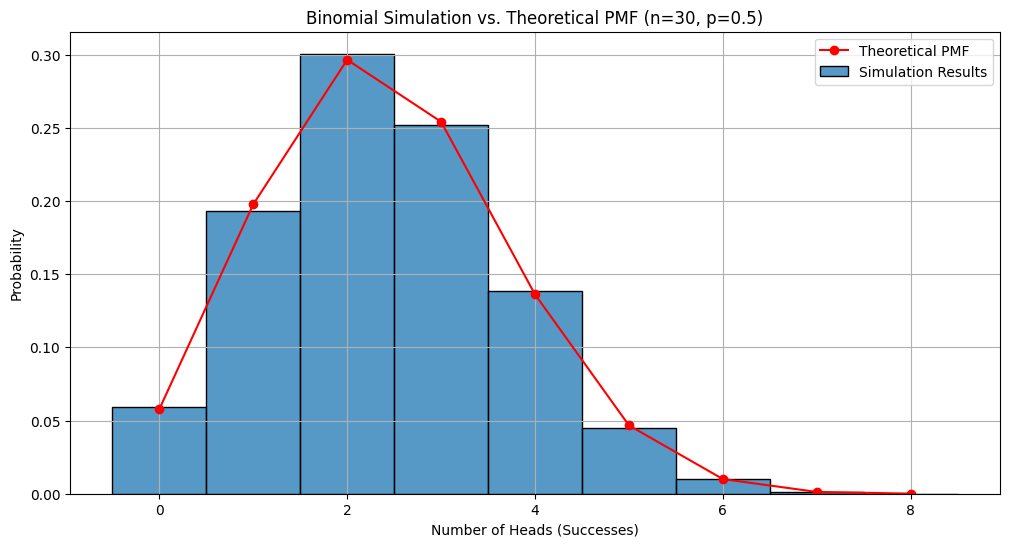

Simulation Mean: 2.40
Theoretical Mean: 2.40


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

# Parameters for the simulation
n = 8    # number of trials
p = 0.3   # probability of success
size = 10000 # number of experiments to simulate

# Run the binomial simulation
simulation_results = np.random.binomial(n, p, size)

# Plot the results of the simulation
plt.figure(figsize=(12, 6))
sns.histplot(simulation_results, stat='probability', discrete=True, label='Simulation Results')

# Overlay the theoretical PMF
x = np.arange(0, n + 1)
theoretical_pmf = binom.pmf(x, n, p)
plt.plot(x, theoretical_pmf, 'ro-', label='Theoretical PMF')

plt.title('Binomial Simulation vs. Theoretical PMF (n=30, p=0.5)')
plt.xlabel('Number of Heads (Successes)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

# Calculate mean and mode from simulation
sim_mean = np.mean(simulation_results)
theo_mean = n * p
print(f"Simulation Mean: {sim_mean:.2f}")
print(f"Theoretical Mean: {theo_mean:.2f}")

**Comparison of two methods**:

`np.random.choice` has great educational value. `np.random.binomial` is more optimized for resolving real tasks.

$\text{np.random.choice}$ vs. $\text{np.random.binomial}$:

| Feature | `np.random.choice` (Method 1) | `np.random.binomial` (Method 2) |
| :--- | :--- | :--- |
| **Simulates** | A single **Bernoulli Trial** (0 or 1, success or failure). | A complete **Binomial Experiment** (the total count of successes). |
| **Underlying Concept** | Simulating the **individual events** that make up the Binomial distribution. | Directly simulating the **result** of the Binomial experiment. |
| **Output** | A matrix of individual 0s and 1s. You need to **sum** the rows to get the Binomial outcome. | A single array of **integer counts** (the number of successes $k$). |
| **Parameters** | Takes `a` (the choices: `[0, 1]`) and `p` (probability of success, $p$). | Takes **$n$** (number of trials) and **$p$** (probability of success). |











## Visualizing the Shape and Skewness of a Binomial Distribution

This example shows how the shape of the Binomial distribution changes based on the probability of success, p.

Problem: Plot the PMF for a binomial distribution with n=20 trials for three different probabilities:
* p = 0.2 (skewed to the right)
* p = 0.5 (symmetrical)
* p = 0.8 (skewed to the left)

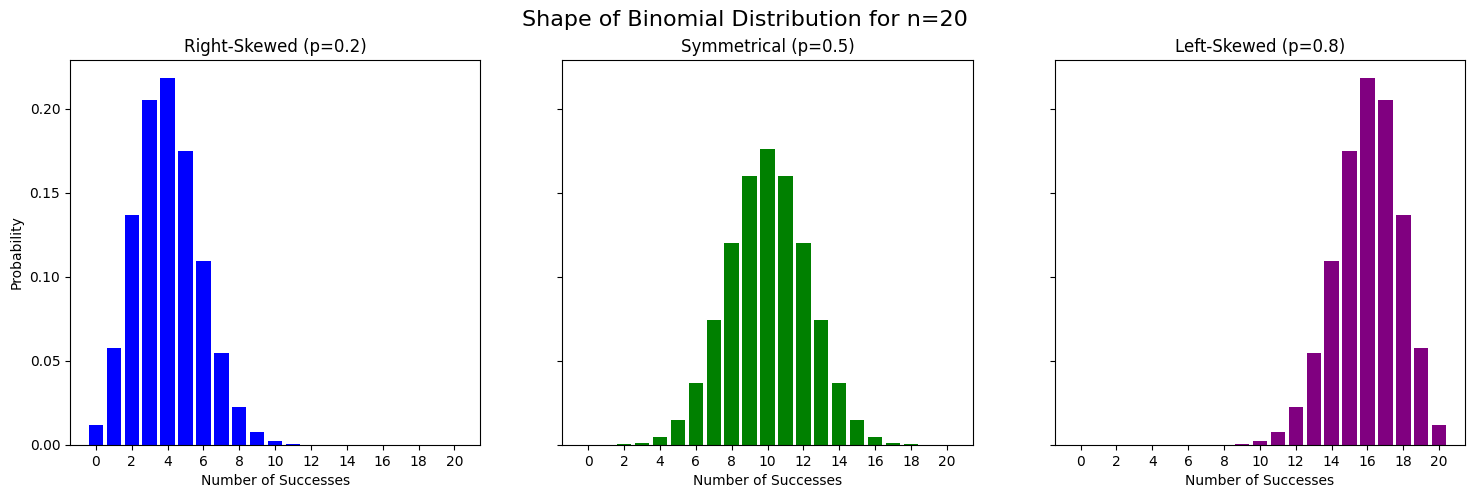

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Common parameter
n = 20
# Values for x-axis
x = np.arange(0, n + 1)

# Probabilities to test
p_values = [0.2, 0.5, 0.8]
titles = ['Right-Skewed (p=0.2)', 'Symmetrical (p=0.5)', 'Left-Skewed (p=0.8)']
colors = ['blue', 'green', 'purple']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, p in enumerate(p_values):
    # Calculate PMF for each p
    pmf = binom.pmf(x, n, p)
    
    # Plotting
    axes[i].bar(x, pmf, color=colors[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Number of Successes')
    axes[i].set_xticks(x[::2]) # Show every other x-tick

axes[0].set_ylabel('Probability')
fig.suptitle('Shape of Binomial Distribution for n=20', fontsize=16)
plt.show()